# PL

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import scipy.signal
from scipy.optimize import curve_fit
import scipy.stats as stats
import pandas as pd
import os
from  scipy.stats import chi2_contingency
#from statsmodels.stats.weightstats import DescrStatsW
import glob
import csv
import fileinput
from glob import glob
import re
from scipy.signal import butter, filtfilt
import scipy.integrate as spi
from scipy.stats import chi2

#ej de path=r'C:\Users\Sergio\Desktop\L6y7\18-04-23'
#path='C:/Users/Nicolás Molina/Desktop/L6-7/04-05-23-14kV'
#path=r'C:\Users\Sergio\Desktop\L6y7\04-05-23-19kV'

path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\PL'

#get_ipython().run_line_magic('matplotlib', 'inline')
#get_ipython().run_line_magic('matplotlib', 'qt5')

import matplotlib.ticker as ticker


# datos ya procesados

In [ ]:
plt.close("all")
os.chdir (path)
from scipy.signal import find_peaks
file="PL primera prueba.txt"

data = np.loadtxt(file, delimiter=' ', skiprows=1, unpack=True)

longonda=data[0]
Ps1=data[1]
Ps2=data[2]
PsNf5=data[3]
PsNf10=data[4]
PsNf15=data[5]
PsNf20=data[6]

norm=max(max(Ps1),max(Ps2),max(PsNf5),max(PsNf10),max(PsNf15),max(PsNf20)) #para normalizar

muestras=[Ps1,Ps2,PsNf5,PsNf10,PsNf15,PsNf20]
titulos=["Ps1","Ps2","Ps/Nf 5%","Ps/Nf 10%","Ps/Nf 15%","Ps/Nf 20%"]

plt.figure()
plt.title("Fotoluminiscencia de PS con diferentes cargas de Naftaleno normalizada")   #Photoluminescence of PS with different loadings of Naphtalene
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Intensidad')
j=0

for film in muestras:
    plt.plot(longonda,film/norm,label=titulos[j])    #divido por norm para normalizar

    j=j+1

peaks, _ = find_peaks(PsNf10,height=1000000)
peak_x = longonda[peaks]
peak_y = PsNf10[peaks]
pico=str(round(peak_x[0]))
plt.scatter(peak_x,peak_y/norm,label=f"{pico} nm",c="black",linewidth=1,ls="-.",zorder=100,s=25)  #pico max psnf10
plt.axvline(320,ls="--",label="320 nm",c="black",linewidth=0.7)
plt.axvline(340,ls="--",label="340 nm",c="blue",linewidth=0.7)
plt.legend()

# procesamiento completo de datos

['Ps CeF3 10.Sample.Cycle1.Raw.csv', 'Ps.Sample.Cycle1.Raw.csv', 'Ps CeF3 5.Sample.Cycle1.Raw.csv', 'Ps CeF3 5 fina.Sample.Cycle1.Raw.csv']


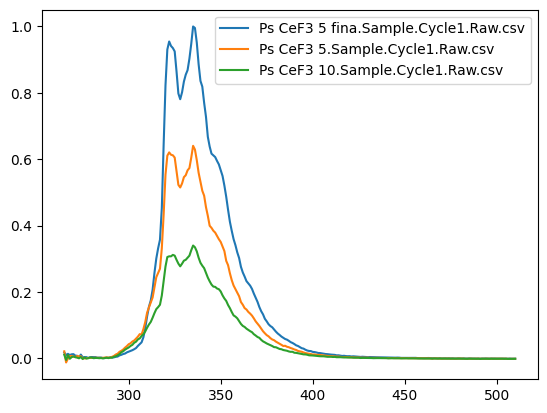

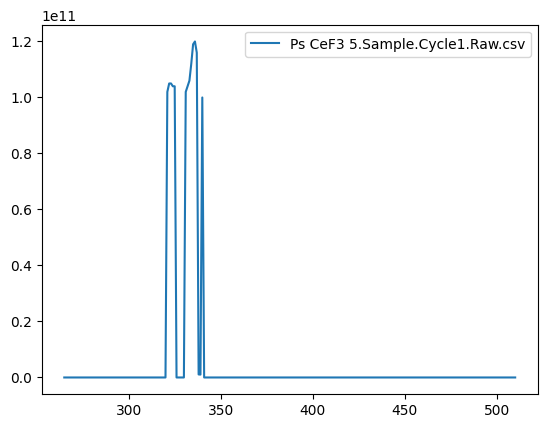

In [5]:
plt.close("all")
path=r'C:\Users\Nicolás Molina\OneDrive\Escritorio\GaNAlGaN\Gan-AlGaN\adquisiciones\PL2 fail+uvvis'
os.chdir (path)

# busco la absorbancia (en uvvis) en el punto donde excito las muestras en el pl
uvvis=glob('*.csv')
baselineuv=np.loadtxt("baseline.txt",delimiter=",",skiprows=1,unpack=True)
#pl=np.loadtxt("pl2fail.txt", delimiter='	', skiprows=1, unpack=True)

def mean(numbers):
    return sum(numbers)/len(numbers)


abs=[]

print(uvvis)

uvvis=["Ps.Sample.Cycle1.Raw.csv","Ps CeF3 5 fina.Sample.Cycle1.Raw.csv","Ps CeF3 5.Sample.Cycle1.Raw.csv","Ps CeF3 10.Sample.Cycle1.Raw.csv"]

#plt.figure()
for film in uvvis:
  uv=np.loadtxt(film, delimiter=',', skiprows=1, unpack=True)
  lambda_=uv[0]
  intensidad=uv[1]-baselineuv[1]  #corrijo
  #plt.plot(lambda_[435:445],intensidad[435:445],label=film)
  abs.append(mean(intensidad[437:443]))
#plt.legend()

#ahora si empiezo con pl

pl=np.loadtxt("pl2fail2.txt", delimiter='	', skiprows=1, unpack=True)


lambdapl=pl[0]
Iblanco=pl[1]
emcorri=pl[6]
wg280=pl[7]

Is=[]


for j in [3,4,5]:
  I0=pl[j]-Iblanco
  T=10**(abs[j-2])
  fabs=1-10**(-abs[j-2])
  Ipl=I0*emcorri*100*(1-T)/(wg280*fabs)
  Ipl=I0*emcorri*100/(wg280)
  #plt.plot(lambdapl,Ipl,label=uvvis[j-2])
  Is.append(Ipl)


maxpscef5viejo=max(Is[0])
maxpscef5=max(Is[1])
maxpscef10=max(Is[2])

maxs=[maxpscef5viejo,maxpscef5,maxpscef10]

Inormalizados=Is/max(maxs)




i=1
plt.figure()
for j in Inormalizados:
  plt.plot(lambdapl,j,label=uvvis[i])
  i=i+1
plt.legend()

# estan raros estos datos de la de ps solo
plt.figure()
plt.plot(lambdapl,pl[2],label=uvvis[2])
plt.legend()
